<a href="https://colab.research.google.com/github/alibabava2003/OCR_Vietnamese/blob/main/Training_Vietocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vietocr
!pip install --upgrade Pillow
!pip install albumentations opencv-python numpy


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 24.8 MB/s eta 0:00:00
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14815 sha256=670403cc78da9ed2ac93f37e3f455600103f808b153ff6200cfa900372af21f8
  Stored in directory: /root/.cache/pip/wheels/04/17/f7/f9585b8ed11a19d05b50f0ab33aa6635a5179241b92982ab27
  Created wheel for prefetch-generator: filename=prefetch_generator-1.0.1-py3-none-any.whl size=3941 sha256=0c21b4ab0ff03530b3a695c189b15e7edf504e90523e906d11b8264e9d5018bc
  Stored in directory: /root/.cache/pip/wheels/8b/24/c0/c552730f6b36b3dfca27ebea2b16c34d144574f8373f4a9d45
Successfully built gdown prefetch-generator
  Att

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 99.0 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
^C
^C


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

#UNZIP FILE

In [ ]:
import zipfile
import tarfile
import os


def extract_and_prepare_data(file_path, extract_dir="extracted_files"):
    if file_path.endswith('.zip'):
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)

    elif file_path.endswith('.tar.gz') or file_path.endswith('.tar'):
        with tarfile.open(file_path, 'r:*') as tar_ref:
            tar_ref.extractall(extract_dir)
    else:
        print("Unsupported file format. Please use ZIP or TAR.")
        return

    folders = [name for name in os.listdir(extract_dir) if os.path.isdir(os.path.join(extract_dir, name))]

    print(f"Extracted folders in '{extract_dir}':")
    for folder in folders:
        print(f"- {folder}")

    # Gán đường dẫn ảnh và file nhãn để đưa vào mô hình
    line_folder = os.path.join(extract_dir, 'line')
    images_folder = os.path.join(line_folder, 'images')
    labels_file = os.path.join(line_folder, 'labels.txt')

    if os.path.exists(images_folder) and os.path.exists(labels_file):
        print("\nDataset ready for training:")
        print(f"- Images folder: {images_folder}")
        print(f"- Labels file: {labels_file}")

        # Trả về đường dẫn để dễ dàng tích hợp vào model
        return images_folder, labels_file
    else:
        print("\nMissing images folder or labels.txt in 'line' folder.")
        return None, None


# Example usage:
file_path = '/content/drive/MyDrive/dataaaaaa/Biên Bản ( Data)/Biên bản (đợt 2).zip'  # Thay bằng đường dẫn file của bạn
images_path, labels_path = extract_and_prepare_data(file_path)

# Giờ bạn có thể truyền 'images_path' và 'labels_path' vào model để train rồi! 🚀

Extracted folders in 'extracted_files':
- .ipynb_checkpoints

Missing images folder or labels.txt in 'line' folder.


In [ ]:
!unzip "/content/drive/MyDrive/dataaaaaa/OCR_dataset.zip" -d "/content/OCR_dataset1"


Streaming output truncated to the last 5000 lines.
  inflating: /content/OCR_dataset1/OCR_dataset/Word/images/188 (66).jpg  
  inflating: /content/OCR_dataset1/OCR_dataset/Word/images/188 (67).jpg  
  inflating: /content/OCR_dataset1/OCR_dataset/Word/images/188 (68).jpg  
  inflating: /content/OCR_dataset1/OCR_dataset/Word/images/188 (69).jpg  
  inflating: /content/OCR_dataset1/OCR_dataset/Word/images/188 (70).jpg  
  inflating: /content/OCR_dataset1/OCR_dataset/Word/images/188 (71).jpg  
  inflating: /content/OCR_dataset1/OCR_dataset/Word/images/188 (72).jpg  
  inflating: /content/OCR_dataset1/OCR_dataset/Word/images/188 (73).jpg  
  inflating: /content/OCR_dataset1/OCR_dataset/Word/images/188 (74).jpg  
  inflating: /content/OCR_dataset1/OCR_dataset/Word/images/188 (75).jpg  
  inflating: /content/OCR_dataset1/OCR_dataset/Word/images/188 (77).jpg  
  inflating: /content/OCR_dataset1/OCR_dataset/Word/images/188 (79).jpg  
  inflating: /content/OCR_dataset1/OCR_dataset/Word/images/18

In [ ]:
!unzip "/content/label.zip" -d "/content/labels_bbdot2"


Archive:  /content/label.zip
  inflating: /content/labels_bbdot2/label.txt  


#GỘP FOLDER ẢNH

In [ ]:
import os
import shutil

# Danh sách các thư mục chứa ảnh
source_folders = [
    "/content/OCR_dataset/OCR_dataset/Line/images",
    "/content/OCR_dataset/OCR_dataset/Word/images",
    "/content/bienbandot2"
]

destination_folder = "/content/data_images"  # Thư mục đích

# Tạo thư mục đích nếu chưa có
os.makedirs(destination_folder, exist_ok=True)

# Duyệt qua từng thư mục và di chuyển ảnh
for folder in source_folders:
    if os.path.exists(folder):  # Kiểm tra xem thư mục có tồn tại không
        print(f"📂 Đang xử lý thư mục: {folder}")
        for file in os.listdir(folder):
            if file.endswith((".jpg", ".png", ".jpeg")):  # Chỉ lấy file ảnh
                src_path = os.path.join(folder, file)
                dst_path = os.path.join(destination_folder, file)
                try:
                    shutil.move(src_path, dst_path)  # Di chuyển ảnh
                    print(f"✅ Di chuyển: {file}")
                except Exception as e:
                    print(f"⚠️ Lỗi khi di chuyển {file}: {e}")

# Kiểm tra số lượng ảnh sau khi gộp
print("📊 Tổng số ảnh sau khi gộp:", len(os.listdir(destination_folder)))
print("✅ Gộp ảnh hoàn tất!")


Streaming output truncated to the last 5000 lines.
✅ Di chuyển: 69_a_21.jpg
✅ Di chuyển: 53_a_26.jpg
✅ Di chuyển: 157 (25).jpg
✅ Di chuyển: 1141.jpg
✅ Di chuyển: 189 (94).jpg
✅ Di chuyển: 177 (81).jpg
✅ Di chuyển: 164 (30).jpg
✅ Di chuyển: 159 (65).jpg
✅ Di chuyển: 192 (17).jpg
✅ Di chuyển: 172 (68).jpg
✅ Di chuyển: 91_c_9.jpg
✅ Di chuyển: 80_b_50.jpg
✅ Di chuyển: 57_b_6.jpg
✅ Di chuyển: 79_b_20.jpg
✅ Di chuyển: 171 (61).jpg
✅ Di chuyển: 54_b_45.jpg
✅ Di chuyển: 82_a_65.jpg
✅ Di chuyển: 63_a_54.jpg
✅ Di chuyển: 69_b_10.jpg
✅ Di chuyển: 191 (86).jpg
✅ Di chuyển: 184 (80).jpg
✅ Di chuyển: 70_b_52.jpg
✅ Di chuyển: 70_b_31.jpg
✅ Di chuyển: 664.jpg
✅ Di chuyển: 78_b_50.jpg
✅ Di chuyển: 1468.jpg
✅ Di chuyển: 80_a_1.jpg
✅ Di chuyển: 179 (15).jpg
✅ Di chuyển: 75_b_3.jpg
✅ Di chuyển: 1270.jpg
✅ Di chuyển: 165.jpg
✅ Di chuyển: 160 (93).jpg
✅ Di chuyển: 58_b_62.jpg
✅ Di chuyển: 632.jpg
✅ Di chuyển: 82_b_19.jpg
✅ Di chuyển: 66_b_18.jpg
✅ Di chuyển: 161 (70).jpg
✅ Di chuyển: 63_a_62.jpg
✅ Di chuyển

In [ ]:
import os

destination_folder = "/content/data_images"
print("Số lượng ảnh trong thư mục đích:", len(os.listdir(destination_folder)))
print("Danh sách file:", os.listdir(destination_folder)[:10])  # In thử 10 file đầu


Số lượng ảnh trong thư mục đích: 11415
Danh sách file: ['193 (8).jpg', '48 (6).jpg', '531.jpg', '1123.jpg', '70_b_43.jpg', '167 (87).jpg', '170.jpg', '169 (21).jpg', '58_b_50.jpg', '63_a_10.jpg']


#GỘP FILE TXT

In [ ]:
source_files = [
    "/content/OCR_dataset/OCR_dataset/Line/labels.txt",
    "/content/OCR_dataset/OCR_dataset/Word/labels.txt",
    "/content/labels_bbdot2/label.txt"
]

output_txt_file = "/content/full_labels.txt"

# Tạo thư mục nếu chưa có
os.makedirs(os.path.dirname(output_txt_file), exist_ok=True)

with open(output_txt_file, "w", encoding="utf-8") as outfile:
    for file_path in source_files:
        if os.path.exists(file_path):  # Kiểm tra file có tồn tại không
            with open(file_path, "r", encoding="utf-8") as infile:
                content = infile.read().strip()
                outfile.write(content + "\n")  # Ghi từng file vào file chung
        else:
            print(f"⚠️ File không tồn tại: {file_path}")

print("✅ Gộp file txt hoàn tất!")

✅ Gộp file txt hoàn tất!


In [ ]:
label_file = "/content/filtered_labels5.txt"  # Thay đường dẫn file nếu cần

valid_lines = 0

with open(label_file, "r", encoding="utf-8") as file:
    for line in file:
        if "\t" in line:  # Kiểm tra xem dòng có chứa tên file + nhãn hay không
            valid_lines += 1

print(f"📊 Số trường hợp hợp lệ trong file {label_file}: {valid_lines}")


📊 Số trường hợp hợp lệ trong file /content/filtered_labels5.txt: 11415


#AUGUMENT DATA

In [ ]:
import os

label_file = "/content/word_test.txt"  # Thay đường dẫn file nếu cần
image_folder = "/content/test_images"  # Thay thư mục chứa ảnh đã augment

# Đọc danh sách ảnh từ thư mục
image_files = set(os.listdir(image_folder))

# Kiểm tra số dòng hợp lệ trong file label
valid_labels = 0
valid_images = set()

with open(label_file, "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split("\t")
        if len(parts) == 2:
            filename = parts[0]
            if filename in image_files:  # Chỉ đếm nếu ảnh thực sự tồn tại
                valid_labels += 1
                valid_images.add(filename)

print(f"📊 Số ảnh thật sự có trong thư mục: {len(image_files)}")
print(f"📋 Số dòng hợp lệ trong file label: {valid_labels}")
print(f"📌 Số ảnh có nhãn khớp với file label: {len(valid_images)}")


📊 Số ảnh thật sự có trong thư mục: 0
📋 Số dòng hợp lệ trong file label: 0
📌 Số ảnh có nhãn khớp với file label: 0


In [ ]:
import os
import cv2
import numpy as np
import albumentations as A

# Thư mục chứa ảnh gốc và ảnh augmented
input_folder = "/content/data_images"
output_folder = "/content/aug_images_chuan"
label_file = "/content/filtered_labels5.txt"
output_label_file = "/content/aug_labels_chuan.txt"

os.makedirs(output_folder, exist_ok=True)

# Số ảnh augment mỗi ảnh gốc
num_augmentations = 2

# Hàm thêm padding lớn trước khi augment
def add_padding(image, pad_x=100, pad_y=50):
    return cv2.copyMakeBorder(image, pad_y, pad_y, pad_x, pad_x, cv2.BORDER_REPLICATE)

# Hàm cắt lại phần chứa chữ (loại bỏ khoảng trắng thừa)
def crop_to_content(image, threshold=240):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY_INV)
    coords = cv2.findNonZero(thresh)
    if coords is not None:
        x, y, w, h = cv2.boundingRect(coords)
        return image[y:y+h, x:x+w]
    return image

# Tạo pipeline augment (đã tối ưu)
transform = A.Compose([
    A.Rotate(limit=5, border_mode=cv2.BORDER_REPLICATE, p=0.6),
    A.Affine(shear={"x": (-8, 8), "y": (-5, 5)}, p=0.5),
    A.GaussNoise(var_limit=(10, 30), p=0.4),
    A.MotionBlur(blur_limit=3, p=0.3),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.4),
    A.Perspective(scale=(0.01, 0.04), p=0.3),
    A.GridDistortion(num_steps=4, distort_limit=0.2, p=0.3),
])

# Đọc file label gốc
with open(label_file, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Tạo file label mới
with open(output_label_file, "w", encoding="utf-8") as file:
    for line in lines:
        img_name, text = line.strip().split("\t", 1)
        img_path = os.path.join(input_folder, img_name)

        # Đọc ảnh gốc
        image = cv2.imread(img_path)
        if image is None:
            continue

        # Thêm padding lớn trước khi augment
        image = add_padding(image, pad_x=150, pad_y=80)

        # Đổi tên ảnh gốc để tránh trùng lặp
        orig_img_name = f"orig_{img_name}"
        orig_img_path = os.path.join(output_folder, orig_img_name)
        cv2.imwrite(orig_img_path, image)
        file.write(f"{orig_img_name}\t{text}\n")

        # Tạo nhiều ảnh augment
        for i in range(num_augmentations):
            augmented = transform(image=image)["image"]
            augmented = crop_to_content(augmented)

            aug_img_name = f"aug_{i}_{img_name}"
            aug_img_path = os.path.join(output_folder, aug_img_name)
            cv2.imwrite(aug_img_path, augmented)
            file.write(f"{aug_img_name}\t{text}\n")

print(f"✅ Hoàn tất tạo {num_augmentations} ảnh augment mỗi ảnh gốc! 🎉")


✅ Hoàn tất tạo 2 ảnh augment mỗi ảnh gốc! 🎉


In [ ]:
image_folder = "/content/data_images"
label_file = "/content/full_labels.txt"
filtered_label_file = "/content/filtered_labels5.txt"

# Lấy danh sách ảnh thực tế có trong thư mục
existing_images = set(os.listdir(image_folder))

# Lọc lại file label
with open(label_file, "r", encoding="utf-8") as infile, open(filtered_label_file, "w", encoding="utf-8") as outfile:
    valid_count = 0
    for line in infile:
        img_name = line.strip().split("\t")[0]  # Lấy tên file ảnh
        if img_name in existing_images:
            outfile.write(line)
            valid_count += 1

print(f"✅ File label đã được lọc xong! Số dòng hợp lệ: {valid_count}")
print(f"📁 File mới: {filtered_label_file}")


✅ File label đã được lọc xong! Số dòng hợp lệ: 11415
📁 File mới: /content/filtered_labels5.txt


#Làm sạch data ( Xóa dấu ....)

In [ ]:
import re

def clean_text_file(input_path, output_path):
    with open(input_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Loại bỏ các dấu chấm liên tiếp
    cleaned_content = re.sub(r'\.\.+', '', content)

    with open(output_path, 'w', encoding='utf-8') as file:
        file.write(cleaned_content)

    print(f"File đã được làm sạch và lưu tại: {output_path}")


# Ví dụ sử dụng
input_file = "/content/OCR_dataset1/OCR_dataset/Line/labels.txt"
output_file = "cleaned_test_labels.txt"
clean_text_file(input_file, output_file)

# Thay 'input.txt' bằng tên file của bạn và chạy mã để làm sạch nội dung!


File đã được làm sạch và lưu tại: cleaned_test_labels.txt


#Chia file thành 3 tệp ( TRAIN, VALID, TEST)

In [ ]:
import random

def split_text_file(input_path, train_path, valid_path, test_path, train_ratio=0.8, valid_ratio=0.1):
    with open(input_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # Xáo trộn dữ liệu
    random.shuffle(lines)

    # Xác định chỉ số cắt
    train_end = int(len(lines) * train_ratio)
    valid_end = train_end + int(len(lines) * valid_ratio)

    # Chia dữ liệu
    train_data = lines[:train_end]
    valid_data = lines[train_end:valid_end]
    test_data = lines[valid_end:]

    # Ghi vào các file
    with open(train_path, 'w', encoding='utf-8') as train_file:
        train_file.writelines(train_data)

    with open(valid_path, 'w', encoding='utf-8') as valid_file:
        valid_file.writelines(valid_data)

    with open(test_path, 'w', encoding='utf-8') as test_file:
        test_file.writelines(test_data)

    print(f"Đã chia thành 3 file: {train_path} (80%), {valid_path} (10%), {test_path} (10%)")

# Ví dụ sử dụng
input_file = "/content/cleaned_labels.txt"
train_file = "word_train.txt"
valid_file = "word_valid.txt"
test_file = "word_test.txt"
split_text_file(input_file, train_file, valid_file, test_file)


Đã chia thành 3 file: word_train.txt (80%), word_valid.txt (10%), word_test.txt (10%)


#Tạo thư mục ảnh TEST

In [ ]:
import os
import shutil

# Đường dẫn các file label
test_label_file = "word_test.txt"
image_folder = "/content/aug_images_chuan"  # Thư mục chứa tất cả ảnh
test_image_folder = "/content/test_images"  # Thư mục lưu ảnh test

# Tạo thư mục test nếu chưa có
os.makedirs(test_image_folder, exist_ok=True)

# Đọc danh sách ảnh trong file test
with open(test_label_file, "r", encoding="utf-8") as file:
    test_images = [line.strip().split("\t")[0] for line in file]

# Sao chép ảnh test vào thư mục riêng
for img_name in test_images:
    src_path = os.path.join(image_folder, img_name)
    dest_path = os.path.join(test_image_folder, img_name)
    if os.path.exists(src_path):  # Kiểm tra ảnh có tồn tại không
        shutil.copy(src_path, dest_path)

print(f"✅ Đã sao chép {len(test_images)} ảnh vào {test_image_folder}")


✅ Đã sao chép 3425 ảnh vào /content/test_images


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:
dataset_params = {
    'name':'hw',
    'data_root':'/content/aug_images_chuan',
    'train_annotation':'/content/word_train.txt',
    'valid_annotation':'/content/word_valid.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':15000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

In [ ]:
trainer = Trainer(config, pretrained=True)

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


Create train_hw: 100%|██████████████████████████████████████| 27396/27396 [00:13<00:00, 2013.09it/s]

Created dataset with 27395 samples



Create valid_hw: 100%|████████████████████████████████████████| 3424/3424 [00:01<00:00, 2045.70it/s]


Created dataset with 3423 samples


valid_hw build cluster: 100%|███████████████████████████████| 3423/3423 [00:00<00:00, 150009.43it/s]


In [ ]:
trainer.config.save('config.yml')

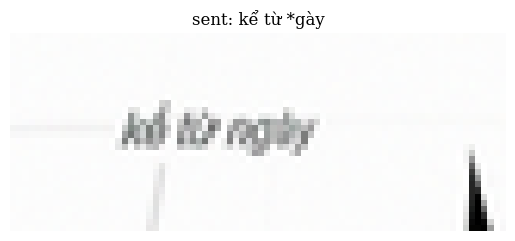

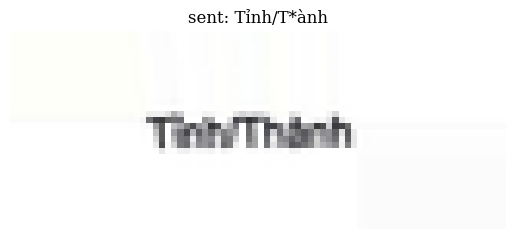

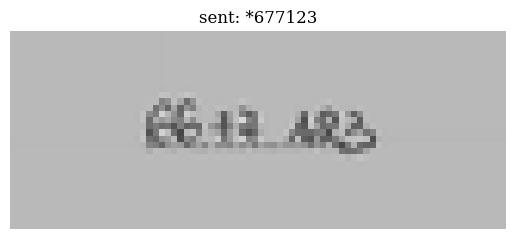

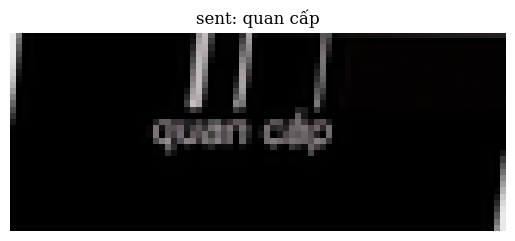

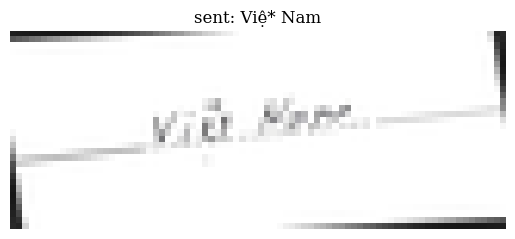

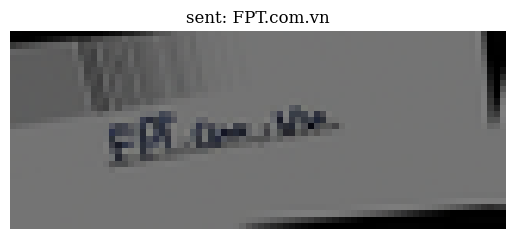

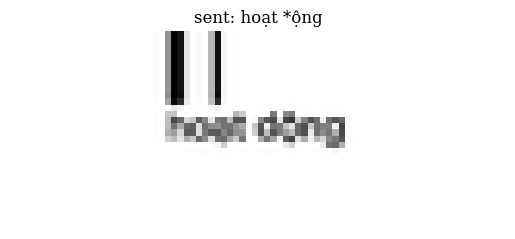

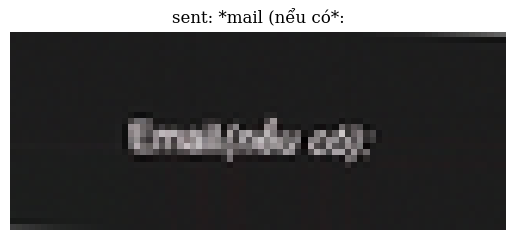

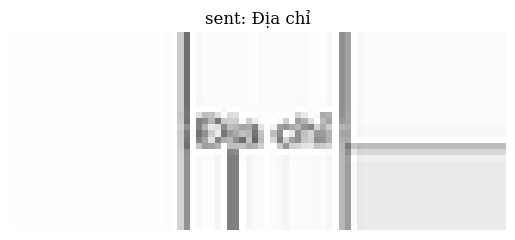

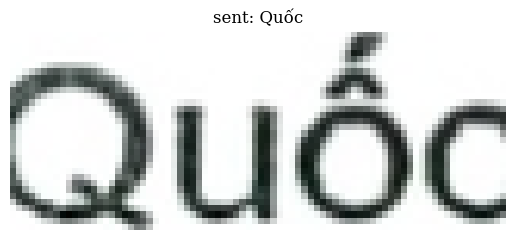

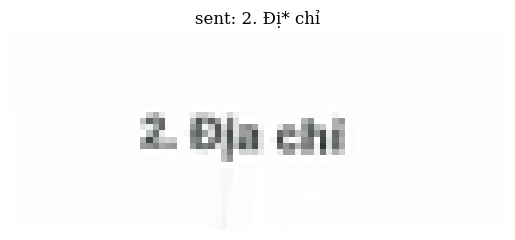

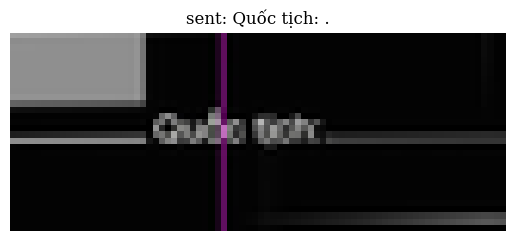

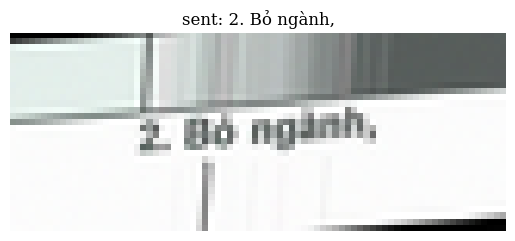

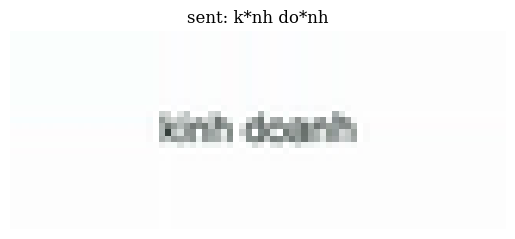

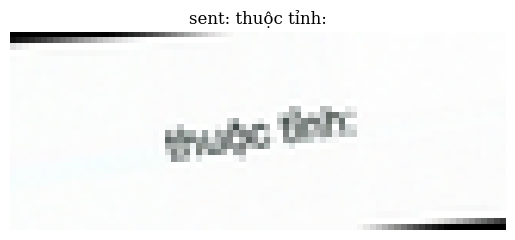

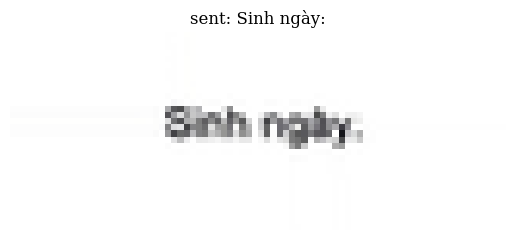

In [ ]:
trainer.visualize_dataset()

In [ ]:
trainer.train()
print("done")

iter: 000200 - train loss: 1.151 - lr: 2.45e-05 - load time: 0.24 - gpu time: 20.72
iter: 000400 - train loss: 0.867 - lr: 5.97e-05 - load time: 0.06 - gpu time: 17.05
iter: 000600 - train loss: 0.757 - lr: 1.12e-04 - load time: 0.06 - gpu time: 16.46
iter: 000800 - train loss: 0.700 - lr: 1.71e-04 - load time: 0.06 - gpu time: 16.94
iter: 001000 - train loss: 0.658 - lr: 2.28e-04 - load time: 0.36 - gpu time: 17.18
iter: 001200 - train loss: 0.655 - lr: 2.73e-04 - load time: 0.06 - gpu time: 17.01
iter: 001400 - train loss: 0.624 - lr: 2.97e-04 - load time: 0.06 - gpu time: 17.61
iter: 001600 - train loss: 0.593 - lr: 3.00e-04 - load time: 0.06 - gpu time: 17.10
iter: 001800 - train loss: 0.593 - lr: 3.00e-04 - load time: 0.43 - gpu time: 16.71
iter: 002000 - train loss: 0.569 - lr: 2.99e-04 - load time: 0.06 - gpu time: 17.68
iter: 002200 - train loss: 0.585 - lr: 2.98e-04 - load time: 0.06 - gpu time: 17.22
iter: 002400 - train loss: 0.559 - lr: 2.97e-04 - load time: 0.06 - gpu time

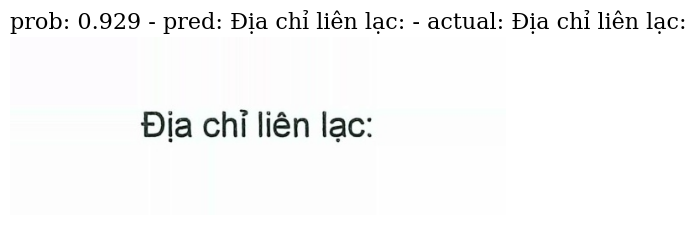

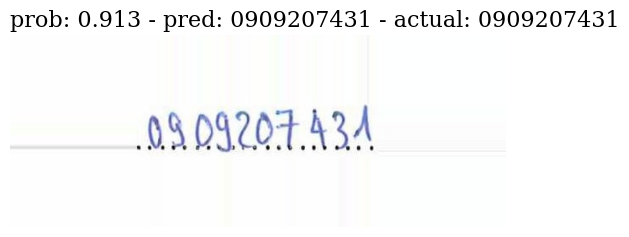

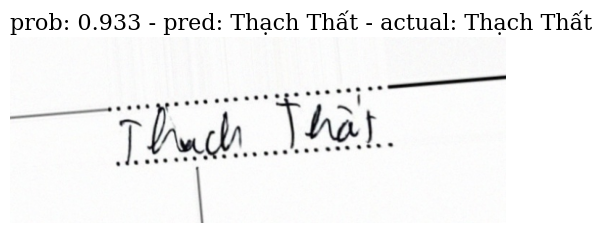

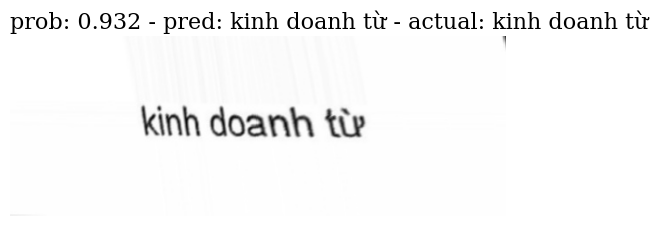

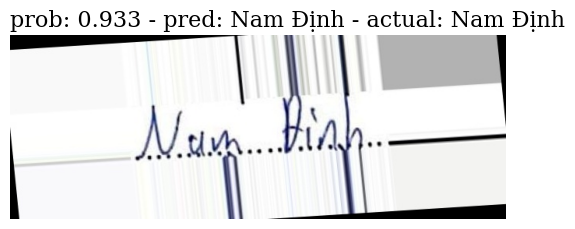

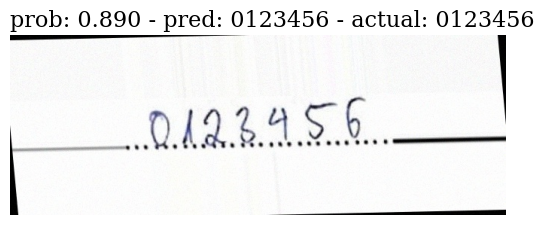

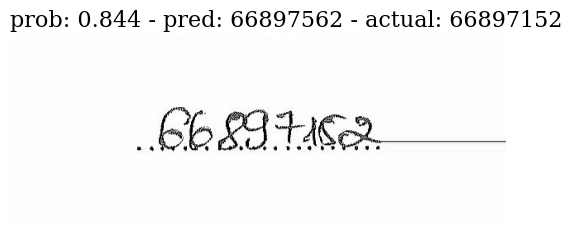

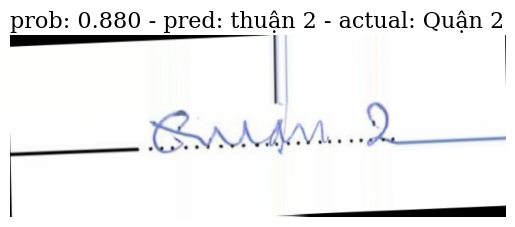

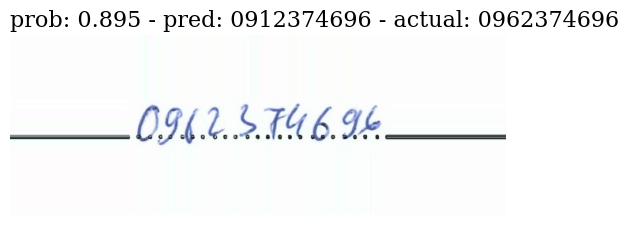

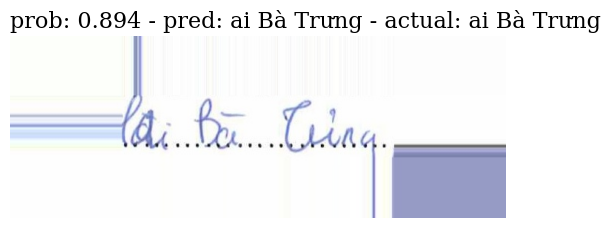

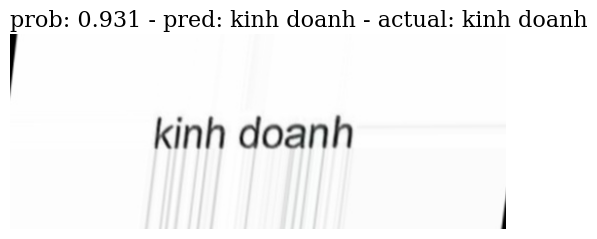

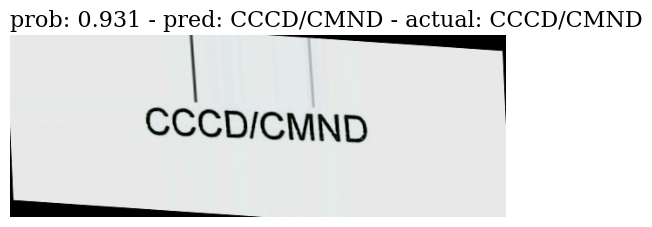

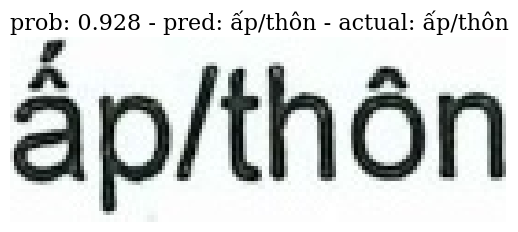

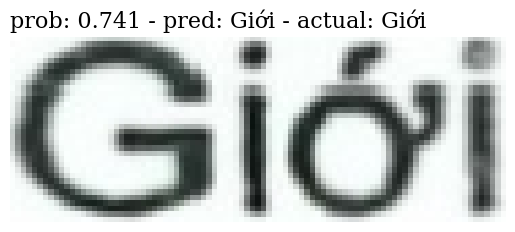

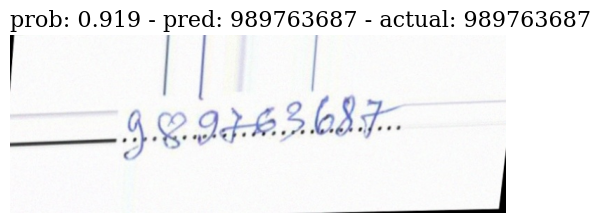

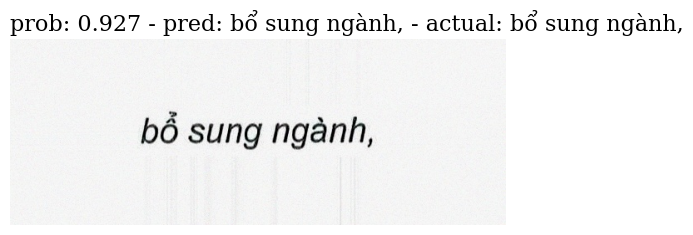

In [ ]:
trainer.visualize_prediction()

#Dự đoán văn bản trên tập test

In [ ]:
!pip install jiwer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.2 MB/s eta 0:00:00


In [ ]:
import os
from PIL import Image

# Định nghĩa đường dẫn
image_folder = "/content/test_images"  # Thư mục chứa tất cả ảnh
test_label_file = "/content/word_test.txt"  # File test.txt chứa danh sách ảnh cần test

# Đọc danh sách ảnh cần test
test_images = []
test_labels = {}

with open(test_label_file, "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split("\t")  # Tách tên file và nhãn bằng tab
        if len(parts) == 2:  # Đảm bảo có đủ thông tin
            filename, label = parts
            test_images.append(filename)
            test_labels[filename] = label  # Lưu nhãn thực tế để so sánh

# Kiểm tra danh sách ảnh cần test
print(f"📌 Có {len(test_images)} ảnh trong tập test.")


📌 Có 3425 ảnh trong tập test.


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')


In [ ]:
config['weights'] = '/content/drive/MyDrive/dataaaaaa/weight/transformerocr (3).pth'
config['cnn']['pretrained']=False
config['device'] = 'cpu'

In [ ]:
detector = Predictor(config)


'NGÀY CHÍNH - KÉ THÔNG HÒA XÃ HỘI CHỦ NGHĨ tHÔNG HÒA KÉ HỘ KINH DOANH'

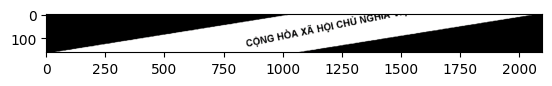

In [ ]:
img = '/content/test_images/aug_0_082.png'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

#TEST TRƯỚC KHI TRAIN

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from difflib import SequenceMatcher

# Load mô hình VietOCR với trọng số mặc định
config = Cfg.load_config_from_name('vgg_transformer')
config['device'] = 'cuda:0'  # Chạy trên GPU (hoặc 'cpu' nếu không có GPU)
detector = Predictor(config)

# Đường dẫn file test
test_label_file = "/content/word_test.txt"
test_image_folder = "/content/test_images"

# Hàm tính độ giống nhau giữa 2 chuỗi
def string_similarity(s1, s2):
    return SequenceMatcher(None, s1, s2).ratio()

# Đọc danh sách test
with open(test_label_file, "r", encoding="utf-8") as f:
    lines = f.readlines()

total = 0
correct = 0
similarity_scores = []

for line in lines:
    try:
        img_name, true_text = line.strip().split("\t", 1)
    except ValueError:
        print(f"⚠ Lỗi đọc dòng: {line.strip()} (Bỏ qua)")
        continue

    img_path = os.path.join(test_image_folder, img_name)

    # Kiểm tra ảnh có tồn tại không
    if not os.path.exists(img_path):
        print(f"⚠ Không tìm thấy ảnh: {img_path} (Bỏ qua)")
        continue

    try:
        # Đọc ảnh
        img = Image.open(img_path)
    except Exception as e:
        print(f"⚠ Lỗi mở ảnh {img_path}: {e}")
        continue

    # Dự đoán bằng VietOCR
    predicted_text = detector.predict(img).strip()

    # In kết quả debug
    print(f"[{total+1}] 📷 {img_name}")
    print(f"   ✅ Ground Truth: {true_text}")
    print(f"   🔍 Predicted   : {predicted_text}")

    # Tính toán độ chính xác
    if predicted_text.lower() == true_text.lower():
        correct += 1

    similarity = string_similarity(predicted_text, true_text)
    similarity_scores.append(similarity)
    total += 1

# Tính accuracy
accuracy = correct / total if total > 0 else 0
avg_similarity = sum(similarity_scores) / len(similarity_scores) if similarity_scores else 0

print("="*50)
print(f"✅ Accuracy (Exact Match): {accuracy * 100:.2f}%")
print(f"🔍 Trung bình độ giống nhau: {avg_similarity * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Streaming output truncated to the last 5000 lines.
   ✅ Ground Truth: báo bỏ
   🔍 Predicted   : Đảo 1
[1761] 📷 aug_0_6 (4).jpg
   ✅ Ground Truth: Hình thức tăng, giảm vốn: Bổ sung thêm vốn
   🔍 Predicted   : Trong Thị Trong Tên
[1762] 📷 orig_194 (69).jpg
   ✅ Ground Truth: phố
   🔍 Predicted   : 03
[1763] 📷 aug_1_193 (55).jpg
   ✅ Ground Truth: 04 người
   🔍 Predicted   : 14
[1764] 📷 aug_1_163 (43).jpg
   ✅ Ground Truth: Xã/Phường/Thị trấn:
   🔍 Predicted   : Xã Phương Thì Vốc
[1765] 📷 aug_1_188 (97).jpg
   ✅ Ground Truth: Website (nếu có):
   🔍 Predicted   : recate (ndu cới trị thị nhất cho chỉ trong chiến thị nhất chiếm trong chính
[1766] 📷 orig_73_c_6.jpg
   ✅ Ground Truth: phố/tổ/xóm/ ấp/thôn
   🔍 Predicted   : printicom botton
[1767] 📷 aug_1_82_a_55.jpg
   ✅ Ground Truth: Chữ ký
   🔍 Predicted   : Cao tạ
[1768] 📷 aug_1_191 (46).jpg
   ✅ Ground Truth: Trung
   🔍 Predicted   : Trung
[1769] 📷 orig_1182.jpg
   ✅ Ground Truth: Vĩnh Phúc
   🔍 Predicted   : Xiên thái
[1770] 📷 aug_1_158 (

#TEST SAU KHI TRAIN

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from difflib import SequenceMatcher

# Load mô hình VietOCR
config = Cfg.load_config_from_name('vgg_transformer')
config['weights'] = '/content/weights/transformerocr.pth'
config['device'] = 'cuda:0'  # Hoặc 'cpu' nếu không có GPU
detector = Predictor(config)

# Đường dẫn file test
test_label_file = "/content/word_test.txt"
test_image_folder = "/content/test_images"

# Hàm tính độ giống nhau giữa 2 chuỗi
def string_similarity(s1, s2):
    return SequenceMatcher(None, s1, s2).ratio()

# Đọc danh sách test
with open(test_label_file, "r", encoding="utf-8") as f:
    lines = f.readlines()

total = 0
correct = 0
similarity_scores = []

for line in lines:
    try:
        img_name, true_text = line.strip().split("\t", 1)
    except ValueError:
        print(f"⚠ Lỗi đọc dòng: {line.strip()} (Bỏ qua)")
        continue

    img_path = os.path.join(test_image_folder, img_name)

    # Kiểm tra ảnh có tồn tại không
    if not os.path.exists(img_path):
        print(f"⚠ Không tìm thấy ảnh: {img_path} (Bỏ qua)")
        continue

    try:
        # Đọc ảnh
        img = Image.open(img_path)
    except Exception as e:
        print(f"⚠ Lỗi mở ảnh {img_path}: {e}")
        continue

    # Dự đoán bằng VietOCR
    predicted_text = detector.predict(img).strip()

    # In kết quả debug
    print(f"[{total+1}] 📷 {img_name}")
    print(f"   ✅ Ground Truth: {true_text}")
    print(f"   🔍 Predicted   : {predicted_text}")

    # Tính toán độ chính xác
    if predicted_text.lower() == true_text.lower():
        correct += 1

    similarity = string_similarity(predicted_text, true_text)
    similarity_scores.append(similarity)
    total += 1

# Tính accuracy
accuracy = correct / total if total > 0 else 0
avg_similarity = sum(similarity_scores) / len(similarity_scores) if similarity_scores else 0

print("="*50)
print(f"✅ Accuracy (Exact Match): {accuracy * 100:.2f}%")
print(f"🔍 Trung bình độ giống nhau: {avg_similarity * 100:.2f}%")


Streaming output truncated to the last 5000 lines.
   ✅ Ground Truth: báo bỏ
   🔍 Predicted   : báo bỏ
[1761] 📷 aug_0_6 (4).jpg
   ✅ Ground Truth: Hình thức tăng, giảm vốn: Bổ sung thêm vốn
   🔍 Predicted   : Hình thức tăng, giảm vốn: Bổ sung thêm
[1762] 📷 orig_194 (69).jpg
   ✅ Ground Truth: phố
   🔍 Predicted   : phố
[1763] 📷 aug_1_193 (55).jpg
   ✅ Ground Truth: 04 người
   🔍 Predicted   : H4 người
[1764] 📷 aug_1_163 (43).jpg
   ✅ Ground Truth: Xã/Phường/Thị trấn:
   🔍 Predicted   : Xã/Phường/Thị trấn:
[1765] 📷 aug_1_188 (97).jpg
   ✅ Ground Truth: Website (nếu có):
   🔍 Predicted   : Website (nếu có):
[1766] 📷 orig_73_c_6.jpg
   ✅ Ground Truth: phố/tổ/xóm/ ấp/thôn
   🔍 Predicted   : phố/tổ/xóm/ ấp/thôn
[1767] 📷 aug_1_82_a_55.jpg
   ✅ Ground Truth: Chữ ký
   🔍 Predicted   : Chữ ký
[1768] 📷 aug_1_191 (46).jpg
   ✅ Ground Truth: Trung
   🔍 Predicted   : Trung
[1769] 📷 orig_1182.jpg
   ✅ Ground Truth: Vĩnh Phúc
   🔍 Predicted   : Vĩnh Phúc
[1770] 📷 aug_1_158 (106).jpg
   ✅ Ground Truth

#TEST Ở TẬP LINE

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from difflib import SequenceMatcher

# Load mô hình VietOCR
config = Cfg.load_config_from_name('vgg_transformer')
config['weights'] = '/content/weights/transformerocr.pth'
config['device'] = 'cuda:0'  # Hoặc 'cpu' nếu không có GPU
detector = Predictor(config)

# Đường dẫn file test
test_label_file = "/content/cleaned_test_labels.txt"
test_image_folder = "/content/OCR_dataset1/OCR_dataset/Line/images"

# Hàm tính độ giống nhau giữa 2 chuỗi
def string_similarity(s1, s2):
    return SequenceMatcher(None, s1, s2).ratio()

# Đọc danh sách test
with open(test_label_file, "r", encoding="utf-8") as f:
    lines = f.readlines()

total = 0
correct = 0
similarity_scores = []

for line in lines:
    try:
        img_name, true_text = line.strip().split("\t", 1)
    except ValueError:
        print(f"⚠ Lỗi đọc dòng: {line.strip()} (Bỏ qua)")
        continue

    img_path = os.path.join(test_image_folder, img_name)

    # Kiểm tra ảnh có tồn tại không
    if not os.path.exists(img_path):
        print(f"⚠ Không tìm thấy ảnh: {img_path} (Bỏ qua)")
        continue

    try:
        # Đọc ảnh
        img = Image.open(img_path)
    except Exception as e:
        print(f"⚠ Lỗi mở ảnh {img_path}: {e}")
        continue

    # Dự đoán bằng VietOCR
    predicted_text = detector.predict(img).strip()

    # In kết quả debug
    print(f"[{total+1}] 📷 {img_name}")
    print(f"   ✅ Ground Truth: {true_text}")
    print(f"   🔍 Predicted   : {predicted_text}")

    # Tính toán độ chính xác
    if predicted_text.lower() == true_text.lower():
        correct += 1

    similarity = string_similarity(predicted_text, true_text)
    similarity_scores.append(similarity)
    total += 1

# Tính accuracy
accuracy = correct / total if total > 0 else 0
avg_similarity = sum(similarity_scores) / len(similarity_scores) if similarity_scores else 0

print("="*50)
print(f"✅ Accuracy (Exact Match): {accuracy * 100:.2f}%")
print(f"🔍 Trung bình độ giống nhau: {avg_similarity * 100:.2f}%")


Streaming output truncated to the last 5000 lines.
   ✅ Ground Truth: 2 Địa chỉ trụ sở hộ kinh doanh:
   🔍 Predicted   : 2. Địa chỉ trụ sở hộ kinh doanh:
[1621] 📷 201 (80).jpg
   ✅ Ground Truth: 19 phố Hàng Vải
   🔍 Predicted   : 19 phô Hàng Vải
[1622] 📷 201 (82).jpg
   ✅ Ground Truth: Số nhà, ngách, hẻm,
   🔍 Predicted   : Số nhà, ngách, hẻm,
[1623] 📷 201 (94).jpg
   ✅ Ground Truth: Điện thoại (nếu có): 0944126628
   🔍 Predicted   : Điện thoại (nếu có): 0944126628
[1624] 📷 202 (8).jpg
   ✅ Ground Truth: (Đánh dấu x để chọn một trong các ngành;
   🔍 Predicted   : (Đánh dấu x để chọn một trong các ngành,
[1625] 📷 202 (14).jpg
   ✅ Ground Truth: 4. Vốn kinh doanh:
   🔍 Predicted   : 4. Vốn kinh doanh:
[1626] 📷 202 (15).jpg
   ✅ Ground Truth: Tổng sổ (bằng số,, bằng chữ, VND):  1.000.000
   🔍 Predicted   : Tổng sổ (bằng số, bằng chữ, VND): 1.000.000
[1627] 📷 202 (17).jpg
   ✅ Ground Truth: 5. Thông tin đăng ký thuế:
   🔍 Predicted   : 5. Thông tin đăng ký thuế:
[1628] 📷 202 (18).jpg
   ✅ 

In [ ]:
detector = Predictor(config)


'Cục cảnh  sát về an ninh xã hộ'

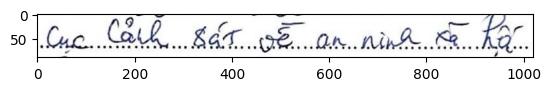

In [ ]:
img = '/content/test_images/images/1303.jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

In [ ]:
!unzip "/content/drive/MyDrive/dataaaaaa/Biên Bản ( Data)/images.zip" -d "/content/test_images"


Archive:  /content/drive/MyDrive/dataaaaaa/Biên Bản ( Data)/images.zip
   creating: /content/test_images/images/
  inflating: /content/test_images/images/1 (10).jpg  
  inflating: /content/test_images/images/1 (11).jpg  
  inflating: /content/test_images/images/1 (12).jpg  
  inflating: /content/test_images/images/1 (13).jpg  
  inflating: /content/test_images/images/1 (14).jpg  
  inflating: /content/test_images/images/1 (16).jpg  
  inflating: /content/test_images/images/1 (17).jpg  
  inflating: /content/test_images/images/1 (18).jpg  
  inflating: /content/test_images/images/1 (19).jpg  
  inflating: /content/test_images/images/1 (2).jpg  
  inflating: /content/test_images/images/1 (20).jpg  
  inflating: /content/test_images/images/1 (21).jpg  
  inflating: /content/test_images/images/1 (22).jpg  
  inflating: /content/test_images/images/1 (23).jpg  
  inflating: /content/test_images/images/1 (24).jpg  
  inflating: /content/test_images/images/1 (26).jpg  
  inflating: /content/

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from jiwer import cer, wer  # Cần cài đặt nếu chưa có: !pip install jiwer

# Đường dẫn
image_folder = "/content/test_images"  # Thư mục chứa tất cả ảnh
test_label_file = "/content/drive/MyDrive/dataaaaaa/Biên Bản ( Data)/labels.txt"  # File chứa danh sách ảnh test

# Đọc danh sách ảnh test
test_images = []
test_labels = {}

with open(test_label_file, "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split("\t")  # Tách theo tab (hoặc space nếu cần)
        if len(parts) == 2:  # Đảm bảo có đủ thông tin
            filename, label = parts
            test_images.append(filename)
            test_labels[filename] = label  # Lưu nhãn thực tế để so sánh

print(f"📌 Có {len(test_images)} ảnh trong tập test.")


📌 Có 3290 ảnh trong tập test.


In [ ]:
img = '/content/output_boxes60/merged_line_1.png'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s


🔤 Độ chính xác ký tự: 0.00%
📚 Độ chính xác từ: 0.00%


# Tính CER & WER

In [ ]:
img = '/content/output_boxes60/merged_line_1.png'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

📂 Thư mục '/content/data_train' có 0 file.


0

#Giá trị CER/WER	Đánh giá
CER < 0.1	Mô hình tốt
0.1 ≤ CER < 0.2	Cần cải thiện một chút
CER ≥ 0.2	Cần tối ưu thêm (tăng dữ liệu, chỉnh mô hình)

In [ ]:
trainer.precision()

In [ ]:
from google.colab import files

# Tải file mô hình về máy
files.download(params['export'])  # Hoặc params['checkpoint'] nếu muốn tải checkpoint


In [ ]:
trainer.scheduler.total_steps = 10000  # Tổng số bước cũ + mới
trainer.scheduler.last_epoch = 5000    # Đặt epoch cuối cùng đã train


In [ ]:
dataset_params = {
    'name': 'hw_word',
    'data_root': '/content/extracted_files/Word/images',
    'train_annotation': '/content/word_train.txt',
    'valid_annotation': '/content/word_valid.txt'
}



params = {
    'print_every': 200,
    'valid_every': 15 * 200,
    'iters': 5000,  # Tổng số bước mới (5000 cũ + 3000 mới)
    'checkpoint': '/content/weights/transformerocr.pth',
    'export': './weights/transformerocr_word.pth',
    'metrics': 10000
}


config['dataset'].update(dataset_params)
config['trainer'].update(params)
config['device'] = 'cuda:0'

trainer.config.save('config.yml')
trainer.train()
print("done")


In [ ]:
trainer.visualize_prediction()

In [ ]:
from google.colab import files

# Tải file mô hình về máy
files.download(params['export'])  # Hoặc params['checkpoint'] nếu muốn tải checkpoint


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>